### Importing necessary libraries

In [42]:
# Data Manipulation and Handling libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

#Multicollinearity Test and Teatment Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Data Preprocessing & EDA Libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

#Model Selection Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#Model Evaluation Libraries
from sklearn.metrics import r2_score, mean_squared_error

# Dealing with warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading the dataframe

In [2]:
# Importing the dataset
df = pd.read_excel("Capstone Project.xlsx")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Part 1 - EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Observations from df.info()

- There are no-null values. 
- 1030 rows and 9 columns. 
- Except age all the columns datatype is flaot. 
- Dependent variable - strength and rest are independent.

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Observations from descriptive Statistics
- There might be skewness in the data in the columns.
- There might be chance of outliers if we compare Quartiles of some of the columns.(age,cement,slag,superplastic,strength in the upper whisker region)
- Since minimum and Q1 values are same for slag and ash we do not have outliers in the Lower Whisker region for them.
- The range of values in age is from 1-365 we can say that the values in days

### Custom Summary Function for EDA Report

In [6]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({
                'Feature Name': col , 
                'Count': my_df[col].count() ,
                'Minimum': my_df[col].min() ,
                'Quartile1': my_df[col].quantile(.25) ,
                'Quartile2': my_df[col].quantile(.50) ,
                'Mean': my_df[col].mean() ,
                'Quartile 3': my_df[col].quantile(.75) ,
                'Maximum': my_df[col].max() ,
                'Variance': round(my_df[col].var()) ,
                'Standard Deviation': my_df[col].std() ,
                'Skewness': my_df[col].skew() , 
                'Kurtosis': my_df[col].kurt()
                })
            result.append(stats)
    result_df = pd.DataFrame(result)
    
    #Skewness type: 
    skewness_label = []
    for i in result_df['Skewness']:
        if i <= -1:
            skewness_label.append('Highly Negatively Skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0:
            skewness_label.append('Fairly Negatively Skewed')
        elif 0 <= i < 0.5:
            skewness_label.append('Fairly Positively Skewed')
        elif 0.5 <= i < 1:
            skewness_label.append('Moderately Positively Skewed')
        elif i >= 1:
            skewness_label.append('Highly Positively Skewed')
    result_df['Skewness Comment'] = skewness_label
    
    # Kurtosis Type
    kurtosis_label = []
    for i in result_df['Kurtosis']:
        if i >= 1:
            kurtosis_label.append('Leptokurtic Curve')
        elif i <= -1:
            kurtosis_label.append('Platykurtic Curve')
        else:
            kurtosis_label.append('Mesokurtic Curve')
    result_df['Kurtosis Comment'] = kurtosis_label
    
    # Outliers
    Outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                Outliers_label.append('Have Outliers')
            else:
                Outliers_label.append('No Outliers')
    result_df['Outlier Comment'] = Outliers_label

            
    return result_df

In [7]:
custom_summary(df)

,Feature Name,Count,Minimum,Quartile1,Quartile2,Mean,Quartile 3,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skewness Comment,Kurtosis Comment,Outlier Comment
0,cement,1030,102.00,192.375,272.900,281.167864,350.000,540.0,10922,104.506364,0.509481,-0.520652,Moderately Positively Skewed,Mesokurtic Curve,No Outliers
1,slag,1030,0.00,0.000,22.000,73.895825,142.950,359.4,7444,86.279342,0.800717,-0.508175,Moderately Positively Skewed,Mesokurtic Curve,Have Outliers
2,ash,1030,0.00,0.000,0.000,54.188350,118.300,200.1,4096,63.997004,0.537354,-1.328746,Moderately Positively Skewed,Platykurtic Curve,No Outliers
3,water,1030,121.80,164.900,185.000,181.567282,192.000,247.0,456,21.354219,0.074628,0.122082,Fairly Positively Skewed,Mesokurtic Curve,Have Outliers
4,superplastic,1030,0.00,0.000,6.400,6.204660,10.200,32.2,36,5.973841,0.907203,1.411269,Moderately Positively Skewed,Leptokurtic Curve,Have Outliers
5,coarseagg,1030,801.00,932.000,968.000,972.918932,1029.400,1145.0,6046,77.753954,-0.040220,-0.599016,Fairly Negatively Skewed,Mesokurtic Curve,No Outliers
6,fineagg,1030,594.00,730.950,779.500,773.580485,824.000,992.6,6428,80.175980,-0.253010,-0.102177,Fairly Negatively Skewed,Mesokurtic Curve,Have Outliers
7,age,1030,1.00,7.000,28.000,45.662136,56.000,365.0,3990,63.169912,3.269177,12.168989,Highly Positively Skewed,Leptokurtic Curve,Have Outliers
8,strength,1030,2.33,23.710,34.445,35.817961,46.135,82.6,279,16.705742,0.416977,-0.313725,Fairly Positively Skewed,Mesokurtic Curve,Have Outliers


### Analysis for Custom Summaries
- Cement has a Mesokurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate. 
- Slag has a Mesorkurtic curve which implies the data points are moderate in distance from the mean so mean and SD are moderate. 
- Ash has a Platykurtic curve which implies the mean doesnt represent the whole data properly so SD is high 
- Water has a Mesokurtic curve which implies the data poinys are moderate in distance from the mean so mean and SD are moderate
- Superplastic has a Leptokurtic curve which implies data points are closer to the mean.

### Performing Outlier Treatment

In [8]:
def replace_outlier(my_df , col , method = 'Quartile' , strategy = 'Median'):
    col_data = my_df[col] #method means how are you supposed to detect the outliers.
    
    
    if method == 'Quartile':
        #Using quartiles to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.5)
        q3 = col_data.quantile(0.75)

        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
        
    elif method == 'Standard Deviation': #we are using empirical method here 
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std
        UW = mean + 2*std
    else:
        print('Pass a correct method')
    
    #printing all the outliers
    
    outliers =  my_df.loc[(col_data < LW) | (col_data > UW)]
    outlier_density = round(len(outliers)/len(my_df) , 2)
    
    if len(outliers) == 0:
        print(f'Feature {col} doesnot have any outliers')
        print('\n') #\n means next line
    else:
        print(f'Feature {col} Has outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'outlier percentage in {col} is {outlier_density}%')
        print('\n')
        display(my_df[(col_data < LW) | (col_data > UW)])
        
    #Replacing outliers 
    if strategy == 'Median':
        my_df.loc[(col_data < LW) | (col_data > UW) , col] = q2
    elif strategy == 'Mean':
         my_df.loc[(col_data < LW) | (col_data > UW) , col] = mean
    else:
        print('pass a correct strategy')
          
    return my_df

# ODT (Outliers Detection Techniques) Plots
- Descriptive plots.
- Histogram with Outliers.
- Histogram Without Outliers.

In [9]:
def odt_plots(my_df , col):
    f , (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(25,8))
    
    #Descriptive Statistics boxplot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col + 'Boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('Boxplot')
    
    #Plotting Histogram with outliers
    sns.distplot(my_df[col] , ax = ax2, fit =sci.norm)
    ax2.axvline(my_df[col].mean() , color = 'green') 
    ax2.axvline(my_df[col].median() , color = 'brown')
    ax2.set_title(col + 'Histogram with outliers')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('values')
    
    #replacing outliers 
    df_out = replace_outlier(my_df , col)
    
    #Plotting Histogram without outliers
    sns.distplot(df_out[col] , ax = ax3, fit =sci.norm) #On histogram i am fitting normal Distribution plot
    ax3.axvline(df_out[col].mean() , color = 'green')
    ax3.axvline(df_out[col].median() , color = 'brown')
    ax3.set_title(col + 'Histogram without outliers')
    ax3.set_ylabel('Density')
    ax3.set_xlabel('values')
    plt.show()

Feature cement doesnot have any outliers




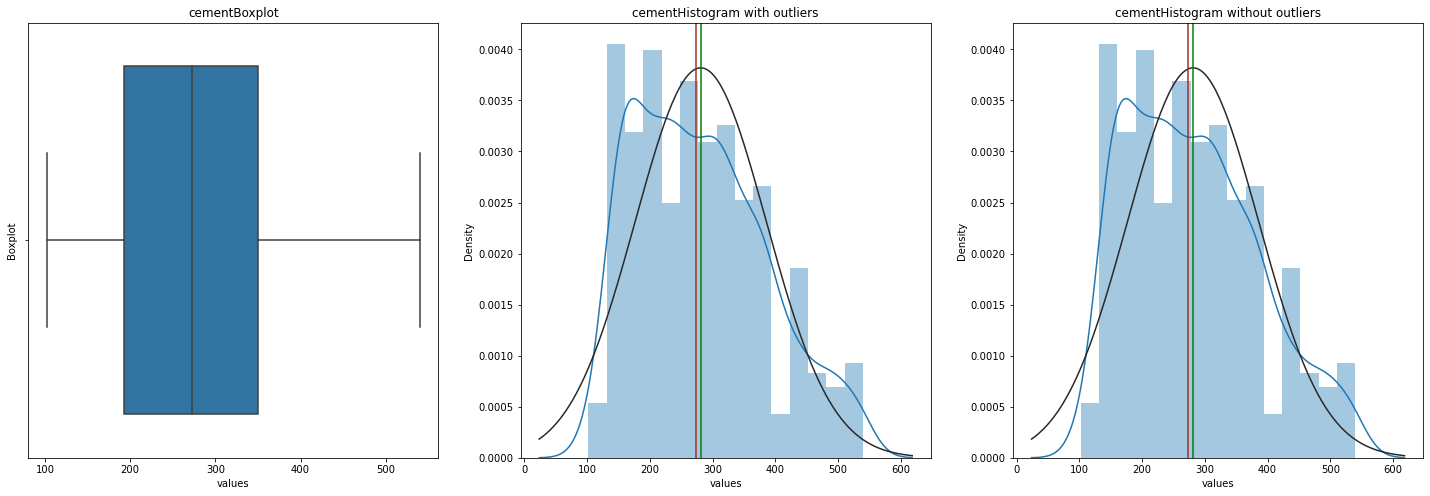

Feature slag Has outliers


Total number of outliers in slag are 2


outlier percentage in slag is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


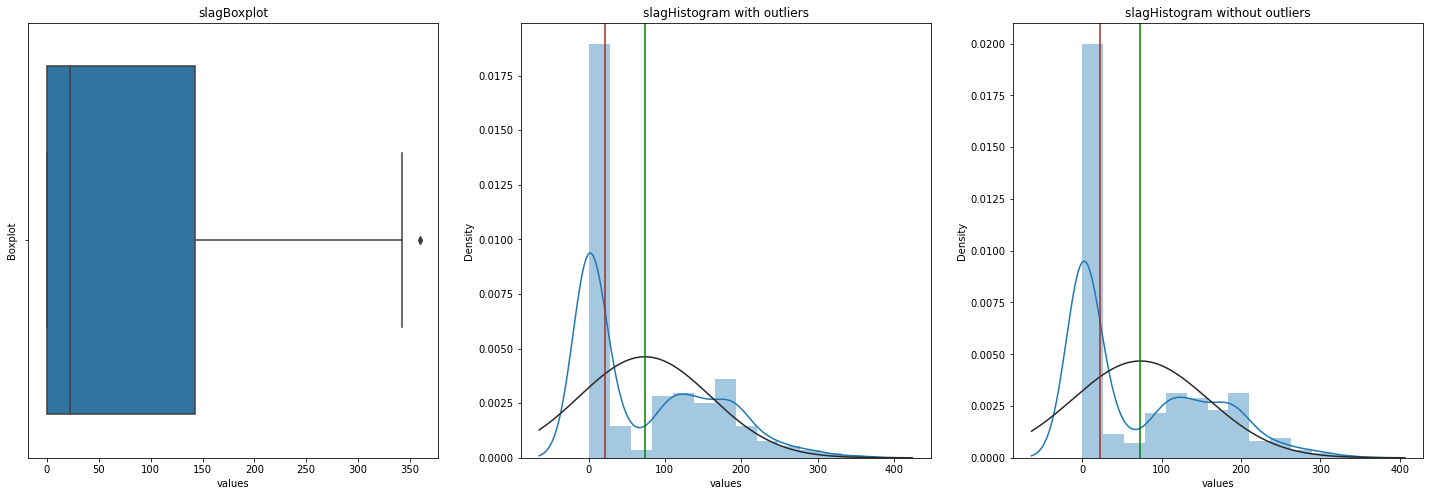

Feature ash doesnot have any outliers




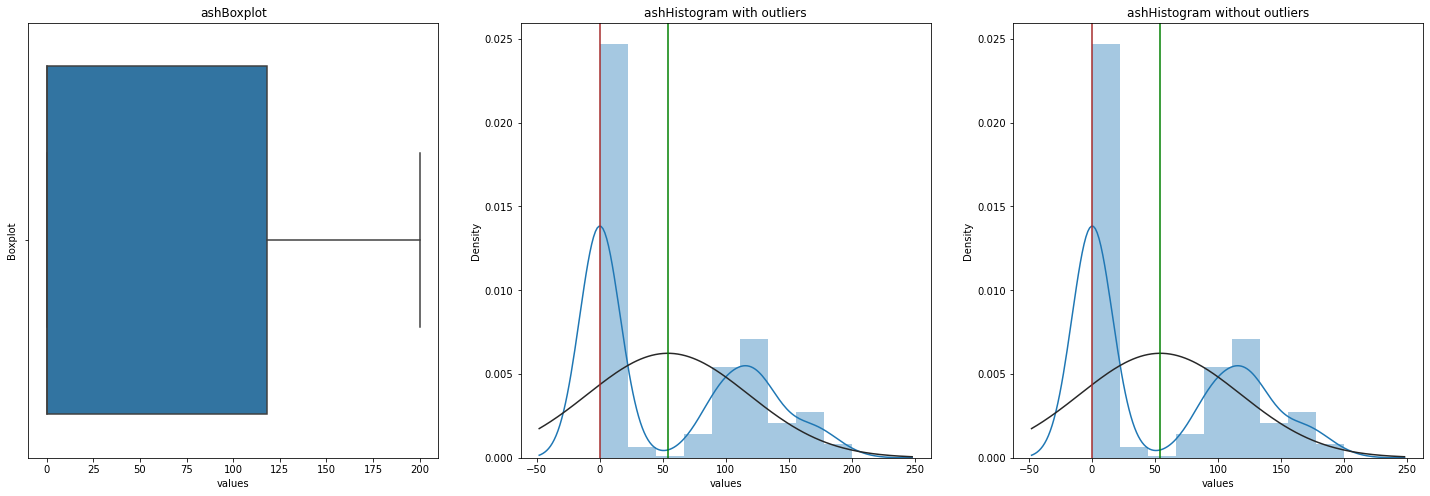

Feature water Has outliers


Total number of outliers in water are 9


outlier percentage in water is 0.01%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


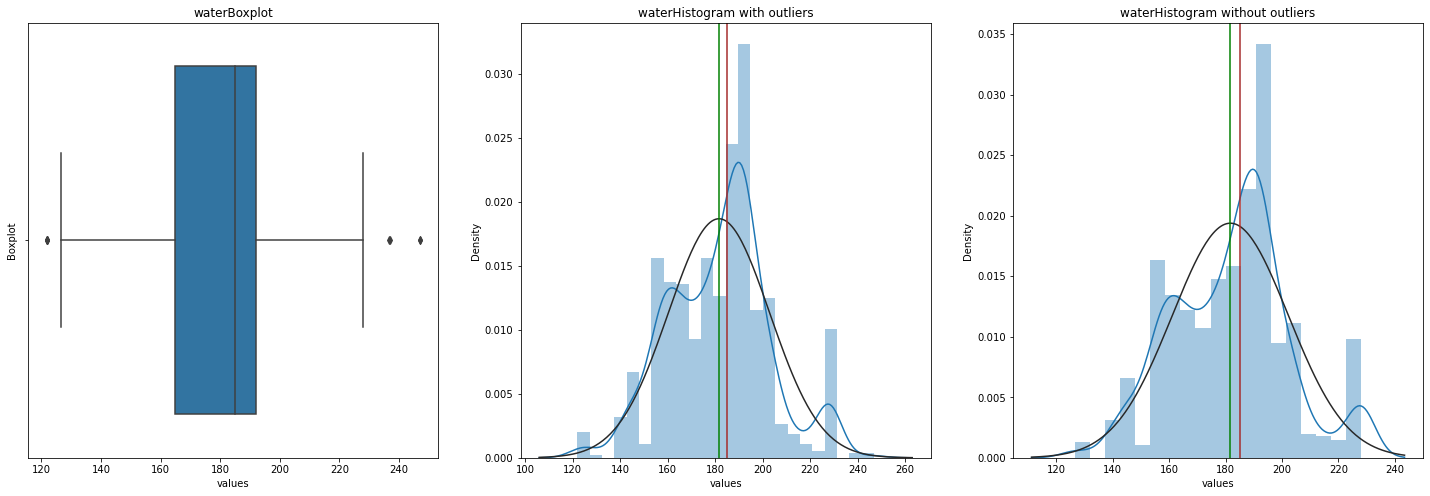

Feature superplastic Has outliers


Total number of outliers in superplastic are 10


outlier percentage in superplastic is 0.01%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


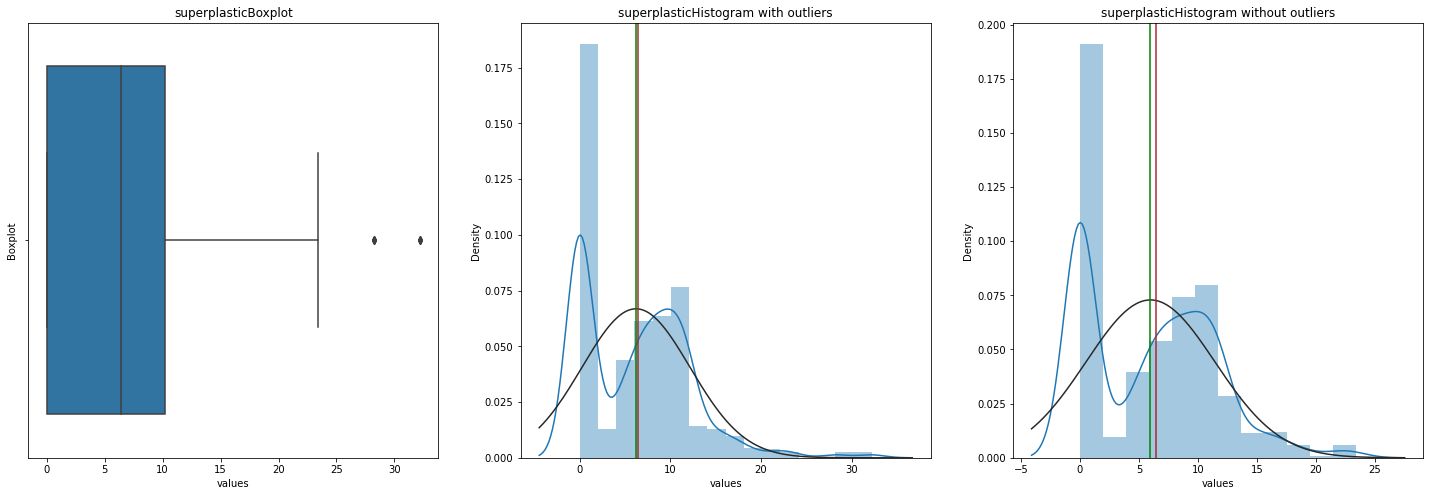

Feature coarseagg doesnot have any outliers




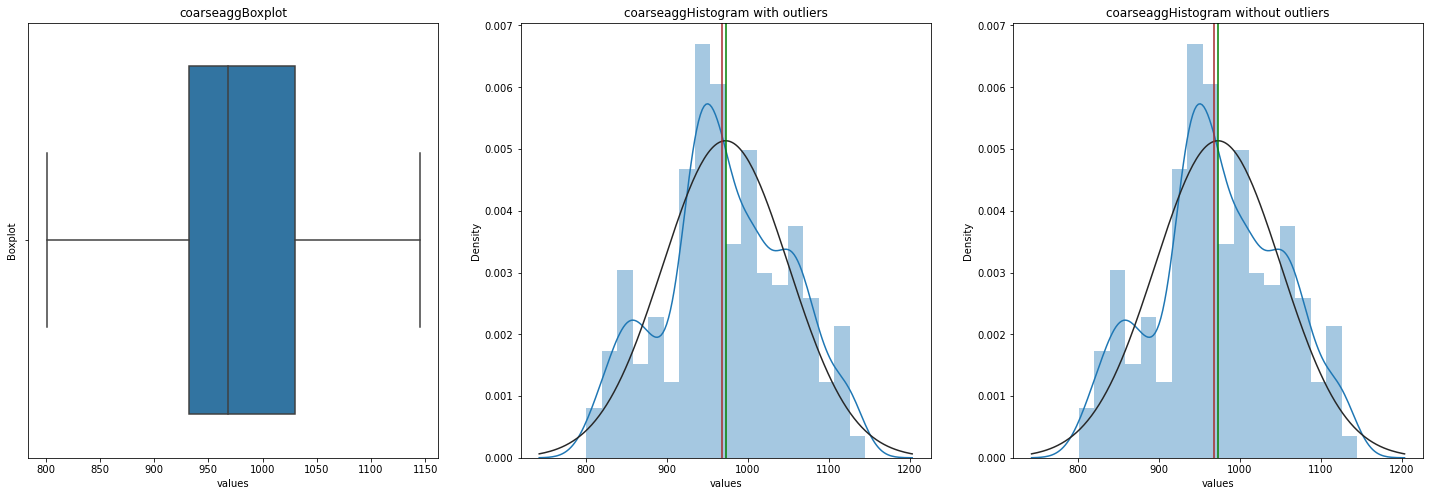

Feature fineagg Has outliers


Total number of outliers in fineagg are 5


outlier percentage in fineagg is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


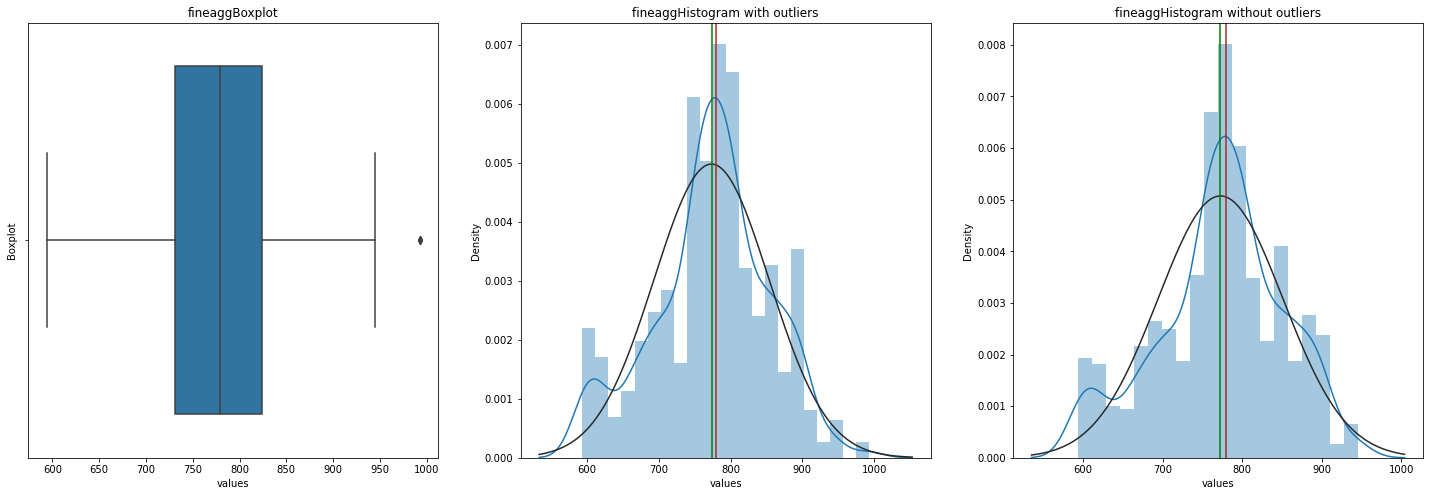

Feature age Has outliers


Total number of outliers in age are 59


outlier percentage in age is 0.06%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


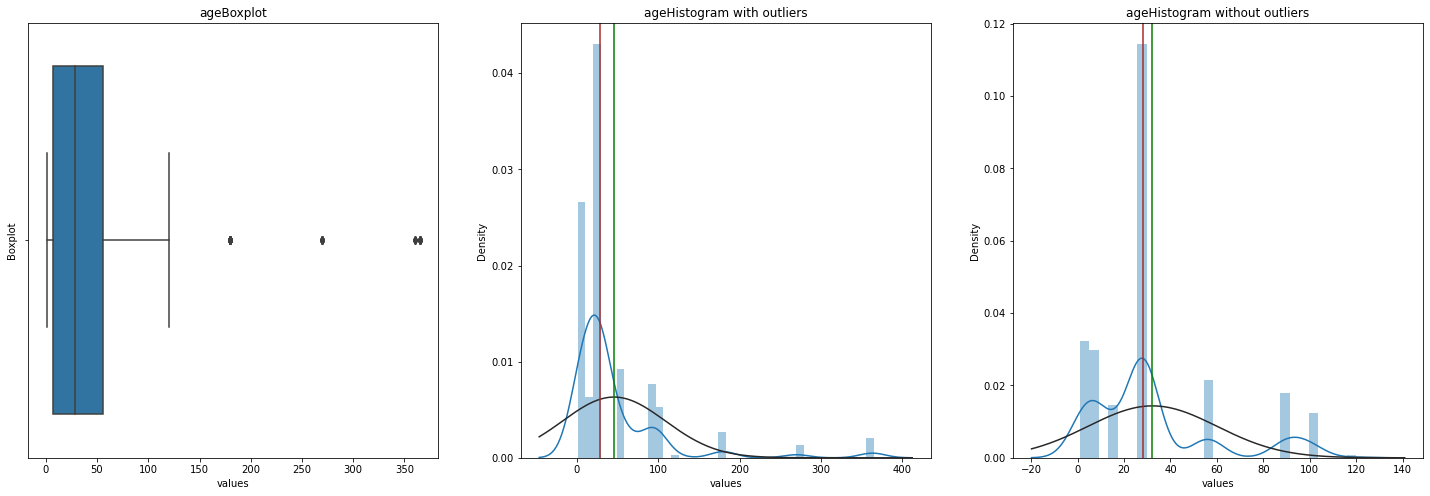

Feature strength Has outliers


Total number of outliers in strength are 4


outlier percentage in strength is 0.0%




,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


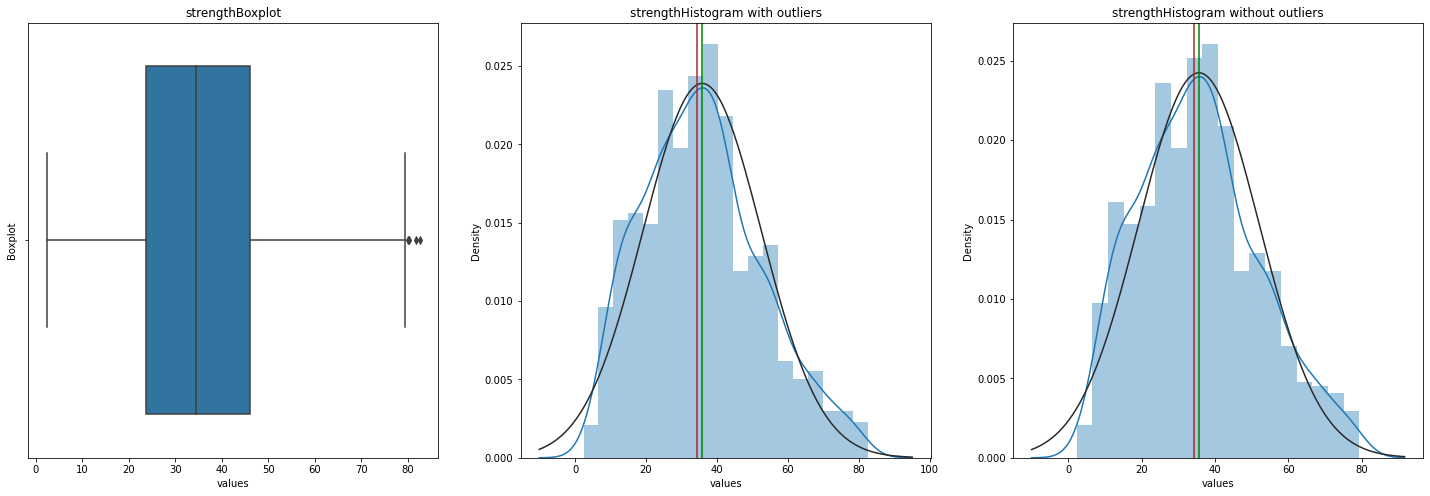

In [10]:
for col in df.columns:
    odt_plots(df , col)

### Multivariate Analysis using Regression

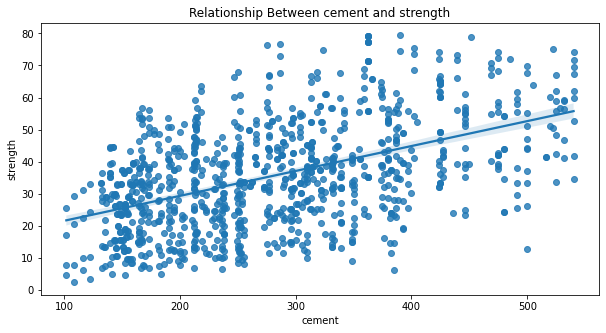

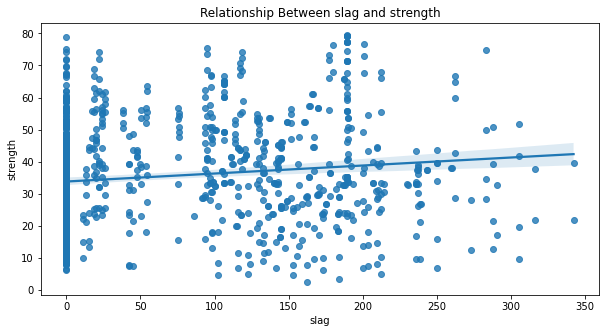

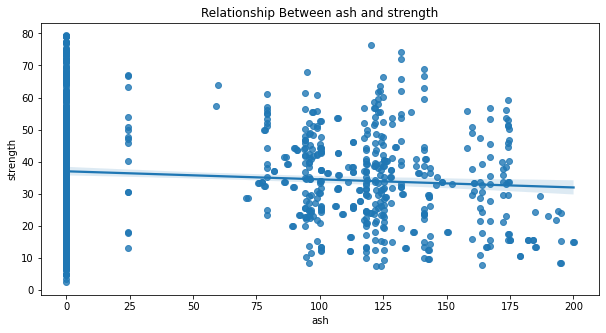

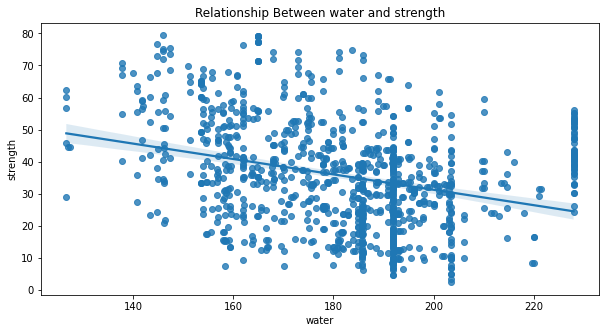

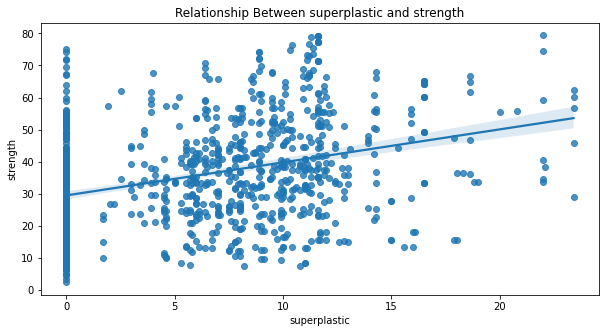

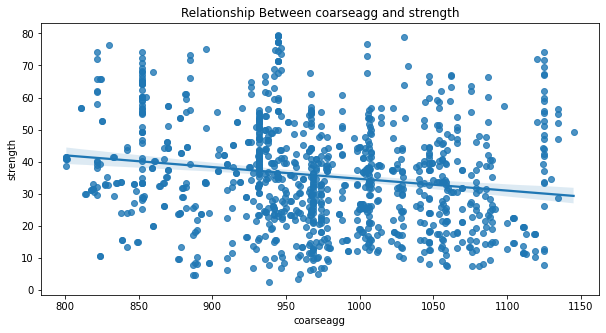

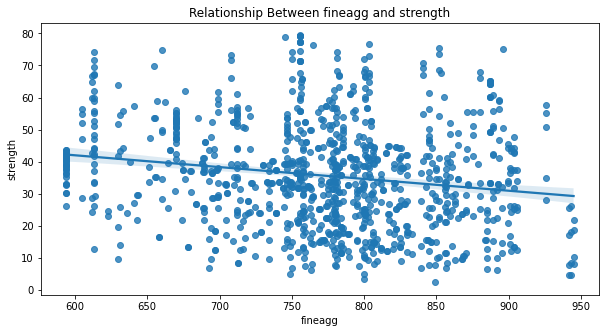

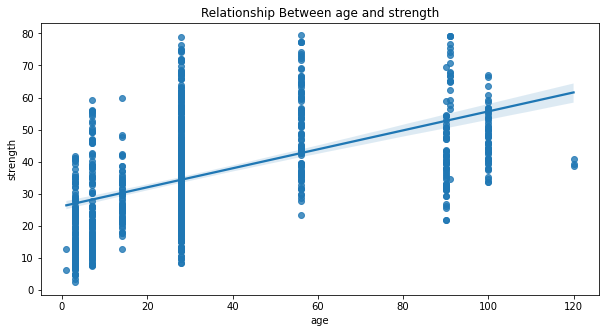

In [11]:
for col in df.columns:
    if col != 'strength':
        fig , ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col] , y = df['strength'] , ax = ax1).set_title(f'Relationship Between {col} and strength')

- Strength and cement are highly positively correlated.
- Strength and slag are slightly positively correlated.
- Strength and ash are slightly negatively correlated.
- Strength and water are highly negatively correlated.
- Superplastic and stength are highly postively correlated.
- Coarseegg and strength are slightly negatively correlated.
- fineegg and strength are highly negatively correlated.
- Age and strength are highly positively correlated.

### Multicollinearity Test
- Correlation Matrix/ HeatMap(Stage 1)

<AxesSubplot:>

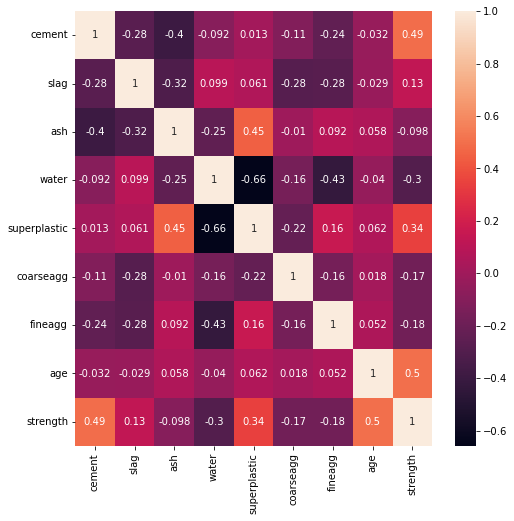

In [12]:
corr= df.corr()
df.ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True)

### Analysis / Results from stage 1 test:
- Slag has high correlation with ash.
- Ash has high correlation with cement, ash, superplastics
- Water has high correlation with superplastics, fineagg.
- Superplastics has high correlation with ash, water.
- Many feature have correlation more than 30% so we can conclude stage 1 results that there is a chance of multicollinearity in the data.

### Multicollinearity Test
Stage 2 - Variance inflation Factor(VIF) Formula for VIF is = 1 / (1-R2)

Steps:
- Regress every indepedent variable with each other and calculate the R2
- Find VIF using above formula.
- If VIF is more than 5 , we say that multicollinearity exists.

In [13]:
def VIF(features):
    vif = pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    vif=vif.sort_values("vif",ascending=False)
    return vif

In [14]:
VIF(df.drop("strength",axis=1))

,vif,features
5,86.938582,coarseagg
3,81.963087,water
6,68.664404,fineagg
0,14.291158,cement
4,5.724145,superplastic
2,4.415840,ash
1,3.342314,slag
7,2.368372,age


## Correlation with the target feature

In [15]:
def correlation_with_tagret(data, t_col):
    independent_variable = data.drop(t_col, axis =1).columns
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable, corr_result], index= ['Independent Variables', 'correlation']).T
    return result.sort_values('correlation', ascending = False)

In [16]:
correlation_with_tagret(df, "strength")

,Independent Variables,correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


### Analysis of correlation with target feature
- Age and cement have a 49% correlation with strength.
- Superplastic and water have 34% and 30% correlation with strength.

### Apply PCA to treat Multicollinearity

In [28]:
def custom_PCA(X):
    n_comp=len(X.columns)
    # Applying Standard Scaler for feature Scaling
    sc=StandardScaler()
    X=sc.fit_transform(X)
    
    for i in range(1,n_comp):
        pca=PCA(n_components=i)
        p_comp=pca.fit_transform(X)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            pcs=i
            break
    print('Explained Variance ratio after PCA is: ', evr)
    
    #Creating a dataframe of principal components
    col=[]
    for j in range(1,pcs+1):
        col.append('PC_'+str(j))
    pca_df=pd.DataFrame(p_comp,columns=col)
    return pca_df

In [29]:
pca_df=custom_PCA(df.drop("strength", axis=1))

Explained Variance ratio after PCA is:  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


### EVR
- EVR can help us decide the number of principal components needed.
- EVR is the percentage of information extracted from the decomposed features

### Joining PCA feature with target feature

In [30]:
pca_df = pca_df.join(df['strength'], how = 'left')

In [32]:
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


In [33]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC_1      1030 non-null   float64
 1   PC_2      1030 non-null   float64
 2   PC_3      1030 non-null   float64
 3   PC_4      1030 non-null   float64
 4   PC_5      1030 non-null   float64
 5   PC_6      1030 non-null   float64
 6   strength  1030 non-null   float64
dtypes: float64(7)
memory usage: 56.5 KB


# Part 2 - Model Building

### Stages of model building
- Custom train-test-split function
- (To Perform) Cross-validation
- (To do) Hyperparameter Tuning

In [35]:
def train_and_test_split(data, tcol, testSize = 0.3, randomState = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize, random_state = randomState)

In [43]:
def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data, t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name , rmse, r2]
    return result

In [44]:
model_builder(model_name = 'LinearRegression' , model = LinearRegression(), data = pca_df, t_col = 'strength')

['LinearRegression', 9.09802941314396, 0.7005612990763812]

In [45]:
def multiple_models(data, t_col):
    col_names = ['Model Name', 'RMSE', 'R2 Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression', LinearRegression() , data, t_col)
    result.loc[len(result)] = model_builder('Lasso Regression', Lasso() , data, t_col)
    result.loc[len(result)] = model_builder('Ridge Regression', Ridge() , data, t_col)
    result.loc[len(result)] = model_builder('DTR', DecisionTreeRegressor() , data, t_col)
    result.loc[len(result)] = model_builder('SVR', SVR() , data, t_col)
    result.loc[len(result)] = model_builder('Random Forest', RandomForestRegressor() , data, t_col)
    result.loc[len(result)] = model_builder('KNN', KNeighborsRegressor() , data, t_col)
    result.loc[len(result)] = model_builder('Gboost', GradientBoostingRegressor() , data, t_col)
    result.loc[len(result)] = model_builder('XGboost', XGBRegressor() , data, t_col)
    result.loc[len(result)] = model_builder('AdaBoost', AdaBoostRegressor() , data, t_col)
    
    return result.sort_values('R2 Score', ascending = False)

In [46]:
multiple_models(pca_df,"strength")

,Model Name,RMSE,R2 Score
8,XGboost,5.952696,0.871814
5,Random Forest,6.377984,0.852843
7,Gboost,6.667994,0.839156
6,KNN,7.798882,0.779972
9,AdaBoost,8.663968,0.728452
0,Linear Regression,9.098029,0.700561
2,Ridge Regression,9.099976,0.700433
3,DTR,9.108889,0.699846
4,SVR,9.123982,0.698851
1,Lasso Regression,9.494112,0.673922


In [50]:
def k_fold_cv(X, y, fold = 10):
    score_LR = cross_val_score(LinearRegression(), X, y, cv = fold)
    score_LS = cross_val_score(Lasso(), X, y ,cv = fold)
    score_RD = cross_val_score(Ridge(), X , y , cv = fold)
    score_DTR = cross_val_score(DecisionTreeRegressor(), X , y , cv = fold)
    score_SVR= cross_val_score(SVR(), X , y , cv = fold)
    score_RandomForest = cross_val_score(RandomForestRegressor(), X , y , cv = fold)
    score_KNN = cross_val_score(KNeighborsRegressor(), X , y , cv = fold)
    score_GBoost = cross_val_score(GradientBoostingRegressor(), X , y , cv = fold)
    score_XGBoost = cross_val_score(XGBRegressor(), X , y , cv = fold)
    score_AdaBoost = cross_val_score(AdaBoostRegressor(), X , y , cv = fold)
    
    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'DTR' , 'SVR' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost']
    scores = [score_LR, score_LS, score_RD, score_DTR, score_SVR,score_RandomForest, score_KNN, score_GBoost, score_XGBoost, score_AdaBoost ]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name , score_mean , score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result , columns = ['Model Name' , 'CV Accuracy' , 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending = False)

In [51]:
k_fold_cv(pca_df.drop('strength', axis=1), pca_df['strength'])

,Model Name,CV Accuracy,CV STD
8,XGBoost,0.873262,0.036061
5,Random Forest,0.868725,0.032303
7,Gboost,0.829085,0.050224
6,KNN,0.768363,0.056017
3,DTR,0.756674,0.063665
9,AdaBoost,0.725671,0.037479
4,SVR,0.703117,0.042765
2,Ridge,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887


### HyperParameter Tuning

In [56]:
def tuning(X, y , fold = 10):
    #Generally we dont do hyperparameter tuning for all the models, becuase if we train lasso and ridge at max it will give.
    #Parameters Grid for tuning
    param_LAS = {'alpha' : [1e-15, 1e-13, 1e-11, 1e-9,1e-7, 1e-5,1e-3, 1e-1, 0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_DTR = {'max_depth' : [3,5,7,9,10,12,14,16] , 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    param_SVR = {'gamma' : ['scale' , 'auto'], 'C' : [0.5 , 1]}
    param_ADB = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta' : [0.1,0.2,0.3,0.4,0.5], 'max_depth' : [3,5,7,9,10,12,14,15,16], 'gamma' : [0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda' : [0,1]}
    param_RF = {'max_depth' : [3,5,7,8,9,10,12,14,16], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}

    
    #hyperparameter Tuning
    tune_LAS = GridSearchCV(Lasso(), param_LAS, cv = fold)
    tune_RID = GridSearchCV(Ridge(), param_LAS , cv = fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor() , param_KNN , cv = fold)
    tune_DT = GridSearchCV(DecisionTreeRegressor(), param_DTR , cv = fold)
    tune_SVR = GridSearchCV(SVR(), param_SVR , cv = fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor() , param_ADB , cv = fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor() , param_GB , cv = fold)
    tune_XGB = GridSearchCV(XGBRegressor() , param_XGB , cv = fold)
    tune_RF = GridSearchCV(RandomForestRegressor() , param_RF , cv = fold)
    
    #Fitting X and Y
    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DT.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    tune = [tune_LAS, tune_RID, tune_KNN, tune_DT, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
    models = ['Lasso', 'Ridge', 'KNN' , 'DTR', 'SVR' , 'ADBR', 'GBR', 'XGBR' , 'RFR']
    
    for i in range(len(tune)):
        print('models:', models[i])
        print('best parameters :', tune[i].best_params_)                             

In [57]:
#tuning(pca_df.drop('strength', axis = 1), pca_df['strength'])

models: Lasso
best parameters : {'alpha': 0.1}
models: Ridge
best parameters : {'alpha': 6}
models: KNN
best parameters : {'n_neighbors': 4}
models: DTR
best parameters : {'max_depth': 14, 'max_features': 5}
models: SVR
best parameters : {'C': 1, 'gamma': 'scale'}
models: ADBR
best parameters : {'learning_rate': 0.6}
models: GBR
best parameters : {'alpha': 0.4}
models: XGBR
best parameters : {'eta': 0.2, 'gamma': 0, 'max_depth': 5, 'reg_lambda': 0}
models: RFR
best parameters : {'max_depth': 14, 'max_features': 3}


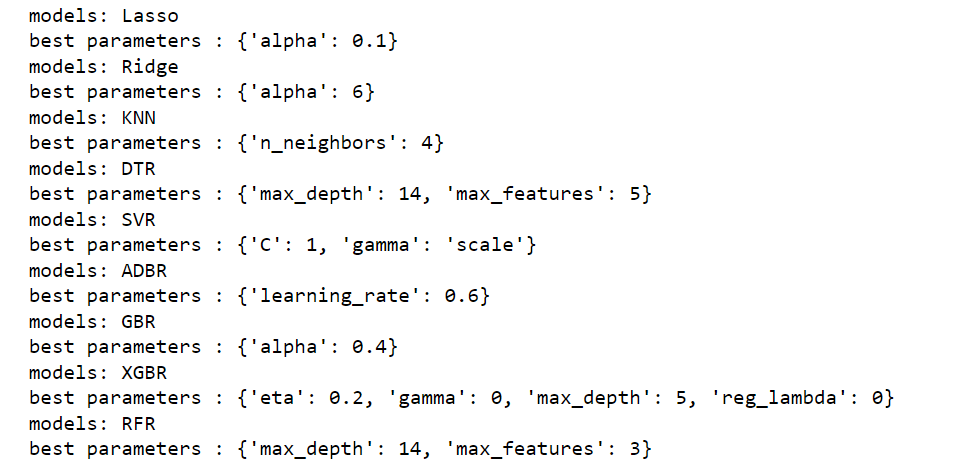